In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
# import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-12 14:28:10.003742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-12 14:28:10.003880: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-12 14:28:10.004763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-12 14:28:10.004771: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
data = pd.read_csv("DataWith_MOCA_August20_OneHotEncoded_for_categorical.csv", low_memory = False) 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Columns: 1953 entries, Unnamed: 0.2 to RESIDENC_4
dtypes: float64(984), int64(793), object(176)
memory usage: 136.8+ MB


In [6]:
df = data[['EDUC','NACCMOCA','MARISTAT_1', 'MARISTAT_3','MARISTAT_4', 'MARISTAT_5','MARISTAT_6', 'MARISTAT_2','NACCFAM','NACCGDS','NACCNE4S','NACCAPOE', 'INDEPEND_1', 'INDEPEND_3','INDEPEND_4', 'INDEPEND_2','RESIDENC_1', 'RESIDENC_3','RESIDENC_4', 'RESIDENC_2','ANYMEDS','NACCAMD','DEL','HALL','DEPD','ANX','APA','DISN', 'IRR','MOT','AGIT','ELAT','NITE','APP','DROPACT','NACCAGEB','SEX', 'CDRGLOB']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUC        9180 non-null   int64  
 1   NACCMOCA    9180 non-null   int64  
 2   MARISTAT_1  9180 non-null   int64  
 3   MARISTAT_3  9180 non-null   int64  
 4   MARISTAT_4  9180 non-null   int64  
 5   MARISTAT_5  9180 non-null   int64  
 6   MARISTAT_6  9180 non-null   int64  
 7   MARISTAT_2  9180 non-null   int64  
 8   NACCFAM     9180 non-null   int64  
 9   NACCGDS     9180 non-null   int64  
 10  NACCNE4S    9180 non-null   int64  
 11  NACCAPOE    9180 non-null   int64  
 12  INDEPEND_1  9180 non-null   int64  
 13  INDEPEND_3  9180 non-null   int64  
 14  INDEPEND_4  9180 non-null   int64  
 15  INDEPEND_2  9180 non-null   int64  
 16  RESIDENC_1  9180 non-null   int64  
 17  RESIDENC_3  9180 non-null   int64  
 18  RESIDENC_4  9180 non-null   int64  
 19  RESIDENC_2  9180 non-null  

In [7]:
# df['MARISTAT_1_0_MARISTAT_2_1'] = np.where((df['MARISTAT_1']==0)&(df['MARISTAT_2']==1), 1, 0)
# df['MARISTAT_3_0_MARISTAT_4_1'] = np.where((df['MARISTAT_3']==0)&(df['MARISTAT_4']==1), 1, 0)
# df['MARISTAT_5_0_MARISTAT_6_1'] = np.where((df['MARISTAT_5']==0)&(df['MARISTAT_6']==1), 1, 0)

# df['INDEPEND_1_0_INDEPEND_2_1'] = np.where((df['INDEPEND_1']==0)&(df['INDEPEND_2']==1), 1, 0)
# df['INDEPEND_3_0_INDEPEND_4_1'] = np.where((df['INDEPEND_3']==0)&(df['INDEPEND_4']==1), 1, 0)

# df['RESIDENC_1_0_RESIDENC_2_1'] = np.where((df['RESIDENC_1']==0)&(df['RESIDENC_2']==1), 1, 0)
# df['RESIDENC_3_0_RESIDENC_4_1'] = np.where((df['RESIDENC_3']==0)&(df['RESIDENC_4']==1), 1, 0)

# df = df.drop(columns=['MARISTAT_1', 'MARISTAT_2','MARISTAT_3', 'MARISTAT_4','MARISTAT_5', 'MARISTAT_6'])
# df = df.drop(columns=['RESIDENC_1', 'RESIDENC_2','RESIDENC_3', 'RESIDENC_4'])
# df = df.drop(columns=['INDEPEND_1', 'INDEPEND_2','INDEPEND_3', 'INDEPEND_4',])
# df.info()

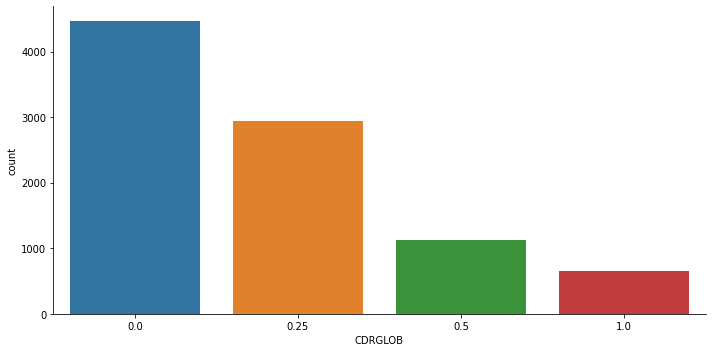

In [8]:
sns.catplot(data = df, x = 'CDRGLOB', kind = 'count', aspect=2)

In [9]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df = normalize(df)

In [10]:
df.isna().any().sum()

0

In [11]:
df.duplicated().sum()

6

In [12]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9174 entries, 0 to 9179
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUC        9174 non-null   float64
 1   NACCMOCA    9174 non-null   float64
 2   MARISTAT_1  9174 non-null   float64
 3   MARISTAT_3  9174 non-null   float64
 4   MARISTAT_4  9174 non-null   float64
 5   MARISTAT_5  9174 non-null   float64
 6   MARISTAT_6  9174 non-null   float64
 7   MARISTAT_2  9174 non-null   float64
 8   NACCFAM     9174 non-null   float64
 9   NACCGDS     9174 non-null   float64
 10  NACCNE4S    9174 non-null   float64
 11  NACCAPOE    9174 non-null   float64
 12  INDEPEND_1  9174 non-null   float64
 13  INDEPEND_3  9174 non-null   float64
 14  INDEPEND_4  9174 non-null   float64
 15  INDEPEND_2  9174 non-null   float64
 16  RESIDENC_1  9174 non-null   float64
 17  RESIDENC_3  9174 non-null   float64
 18  RESIDENC_4  9174 non-null   float64
 19  RESIDENC_2  9174 non-null  

In [13]:
df.isnull().sum()

EDUC          0
NACCMOCA      0
MARISTAT_1    0
MARISTAT_3    0
MARISTAT_4    0
MARISTAT_5    0
MARISTAT_6    0
MARISTAT_2    0
NACCFAM       0
NACCGDS       0
NACCNE4S      0
NACCAPOE      0
INDEPEND_1    0
INDEPEND_3    0
INDEPEND_4    0
INDEPEND_2    0
RESIDENC_1    0
RESIDENC_3    0
RESIDENC_4    0
RESIDENC_2    0
ANYMEDS       0
NACCAMD       0
DEL           0
HALL          0
DEPD          0
ANX           0
APA           0
DISN          0
IRR           0
MOT           0
AGIT          0
ELAT          0
NITE          0
APP           0
DROPACT       0
NACCAGEB      0
SEX           0
CDRGLOB       0
dtype: int64

In [14]:
for col in df:
  print(df[col].unique())

[0.43333333 0.53333333 0.33333333 0.66666667 0.56666667 0.6
 0.8        0.1        0.5        0.46666667 0.63333333 0.36666667
 0.4        0.83333333 0.86666667 0.2        1.         0.7
 0.73333333 0.3        0.76666667 0.26666667 0.16666667 0.13333333
 0.23333333 0.06666667 0.03333333 0.         0.96666667]
[0.7        0.83333333 0.43333333 0.96666667 0.86666667 0.16666667
 0.3        0.93333333 0.63333333 0.9        0.76666667 0.8
 0.26666667 0.46666667 0.66666667 0.56666667 0.4        0.53333333
 0.5        1.         0.13333333 0.6        0.73333333 0.23333333
 0.33333333 0.36666667 0.03333333 0.2        0.1        0.06666667
 0.        ]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0.         0.26666667 0.53333333 0.2        0.46666667 0.06666667
 0.13333333 0.33333333 0.93333333 0.6        0.66666667 0.8
 0.4        0.73333333 0.86666667 1.        ]
[0.  1.  0.5]
[0.  0.4 0.6 0.2 0.8 1. ]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0.1666

In [15]:
def drop_outliers_IQR(df, column):
   q1=(df[column].quantile(0.25))
   q3=(df[column].quantile(0.75))
   IQR=q3-q1
   df_filtered = df[np.logical_and(((df[column]>=(q1-1.5*IQR))),((df[column]<=(q3+1.5*IQR))))]
   df_filtered = df_filtered.dropna().reset_index(drop=True)
   return df_filtered

In [16]:
columns = ["EDUC", "NACCMOCA", "NACCGDS", "NACCNE4S", "NACCAMD", "NACCAGEB"]
for i in columns:
    df = drop_outliers_IQR(df, i)
    df[i].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUC        8254 non-null   float64
 1   NACCMOCA    8254 non-null   float64
 2   MARISTAT_1  8254 non-null   float64
 3   MARISTAT_3  8254 non-null   float64
 4   MARISTAT_4  8254 non-null   float64
 5   MARISTAT_5  8254 non-null   float64
 6   MARISTAT_6  8254 non-null   float64
 7   MARISTAT_2  8254 non-null   float64
 8   NACCFAM     8254 non-null   float64
 9   NACCGDS     8254 non-null   float64
 10  NACCNE4S    8254 non-null   float64
 11  NACCAPOE    8254 non-null   float64
 12  INDEPEND_1  8254 non-null   float64
 13  INDEPEND_3  8254 non-null   float64
 14  INDEPEND_4  8254 non-null   float64
 15  INDEPEND_2  8254 non-null   float64
 16  RESIDENC_1  8254 non-null   float64
 17  RESIDENC_3  8254 non-null   float64
 18  RESIDENC_4  8254 non-null   float64
 19  RESIDENC_2  8254 non-null  

In [17]:
df.head()

,EDUC,NACCMOCA,MARISTAT_1,MARISTAT_3,MARISTAT_4,MARISTAT_5,MARISTAT_6,MARISTAT_2,NACCFAM,NACCGDS,...,IRR,MOT,AGIT,ELAT,NITE,APP,DROPACT,NACCAGEB,SEX,CDRGLOB
0,0.433333,0.700000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.210526,0.0,0.50
1,0.533333,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.25
2,0.666667,0.966667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.342105,0.0,0.00
3,0.566667,0.866667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.289474,0.0,0.25
4,0.666667,0.300000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.066667,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.289474,1.0,0.50


In [18]:
df_1 = df[df['CDRGLOB'] == 0]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4266 entries, 2 to 8253
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUC        4266 non-null   float64
 1   NACCMOCA    4266 non-null   float64
 2   MARISTAT_1  4266 non-null   float64
 3   MARISTAT_3  4266 non-null   float64
 4   MARISTAT_4  4266 non-null   float64
 5   MARISTAT_5  4266 non-null   float64
 6   MARISTAT_6  4266 non-null   float64
 7   MARISTAT_2  4266 non-null   float64
 8   NACCFAM     4266 non-null   float64
 9   NACCGDS     4266 non-null   float64
 10  NACCNE4S    4266 non-null   float64
 11  NACCAPOE    4266 non-null   float64
 12  INDEPEND_1  4266 non-null   float64
 13  INDEPEND_3  4266 non-null   float64
 14  INDEPEND_4  4266 non-null   float64
 15  INDEPEND_2  4266 non-null   float64
 16  RESIDENC_1  4266 non-null   float64
 17  RESIDENC_3  4266 non-null   float64
 18  RESIDENC_4  4266 non-null   float64
 19  RESIDENC_2  4266 non-null  

In [19]:
df_2 = df[df['CDRGLOB'] == 0.25]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1 to 8252
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUC        2666 non-null   float64
 1   NACCMOCA    2666 non-null   float64
 2   MARISTAT_1  2666 non-null   float64
 3   MARISTAT_3  2666 non-null   float64
 4   MARISTAT_4  2666 non-null   float64
 5   MARISTAT_5  2666 non-null   float64
 6   MARISTAT_6  2666 non-null   float64
 7   MARISTAT_2  2666 non-null   float64
 8   NACCFAM     2666 non-null   float64
 9   NACCGDS     2666 non-null   float64
 10  NACCNE4S    2666 non-null   float64
 11  NACCAPOE    2666 non-null   float64
 12  INDEPEND_1  2666 non-null   float64
 13  INDEPEND_3  2666 non-null   float64
 14  INDEPEND_4  2666 non-null   float64
 15  INDEPEND_2  2666 non-null   float64
 16  RESIDENC_1  2666 non-null   float64
 17  RESIDENC_3  2666 non-null   float64
 18  RESIDENC_4  2666 non-null   float64
 19  RESIDENC_2  2666 non-null  

In [20]:
df_3 = df[df['CDRGLOB'] == 0.5]
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 8250
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUC        928 non-null    float64
 1   NACCMOCA    928 non-null    float64
 2   MARISTAT_1  928 non-null    float64
 3   MARISTAT_3  928 non-null    float64
 4   MARISTAT_4  928 non-null    float64
 5   MARISTAT_5  928 non-null    float64
 6   MARISTAT_6  928 non-null    float64
 7   MARISTAT_2  928 non-null    float64
 8   NACCFAM     928 non-null    float64
 9   NACCGDS     928 non-null    float64
 10  NACCNE4S    928 non-null    float64
 11  NACCAPOE    928 non-null    float64
 12  INDEPEND_1  928 non-null    float64
 13  INDEPEND_3  928 non-null    float64
 14  INDEPEND_4  928 non-null    float64
 15  INDEPEND_2  928 non-null    float64
 16  RESIDENC_1  928 non-null    float64
 17  RESIDENC_3  928 non-null    float64
 18  RESIDENC_4  928 non-null    float64
 19  RESIDENC_2  928 non-null    

In [21]:
df_4 = df[df['CDRGLOB'] == 1]
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 27 to 8236
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUC        394 non-null    float64
 1   NACCMOCA    394 non-null    float64
 2   MARISTAT_1  394 non-null    float64
 3   MARISTAT_3  394 non-null    float64
 4   MARISTAT_4  394 non-null    float64
 5   MARISTAT_5  394 non-null    float64
 6   MARISTAT_6  394 non-null    float64
 7   MARISTAT_2  394 non-null    float64
 8   NACCFAM     394 non-null    float64
 9   NACCGDS     394 non-null    float64
 10  NACCNE4S    394 non-null    float64
 11  NACCAPOE    394 non-null    float64
 12  INDEPEND_1  394 non-null    float64
 13  INDEPEND_3  394 non-null    float64
 14  INDEPEND_4  394 non-null    float64
 15  INDEPEND_2  394 non-null    float64
 16  RESIDENC_1  394 non-null    float64
 17  RESIDENC_3  394 non-null    float64
 18  RESIDENC_4  394 non-null    float64
 19  RESIDENC_2  394 non-null   

In [22]:
from sklearn.model_selection import train_test_split

label_encoder = preprocessing.LabelEncoder()
new_df_1 = pd.DataFrame(df_1, columns=df_1.columns)
X1 = new_df_1.drop(columns = ['CDRGLOB']).copy()
y1 = new_df_1['CDRGLOB']
X1_train, X1_rem, y1_train, y1_rem = train_test_split(X1,y1, train_size=0.7)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_rem,y1_rem, test_size=0.5)

new_df_2 = pd.DataFrame(df_2, columns=df_2.columns)
X2 = new_df_2.drop(columns = ['CDRGLOB']).copy()
y2 = new_df_2['CDRGLOB']
X2_train, X2_rem, y2_train, y2_rem = train_test_split(X2,y2, train_size=0.7)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_rem,y2_rem, test_size=0.5)

new_df_3 = pd.DataFrame(df_3, columns=df_3.columns)
X3 = new_df_3.drop(columns = ['CDRGLOB']).copy()
y3 = new_df_3['CDRGLOB']
X3_train, X3_rem, y3_train, y3_rem = train_test_split(X3,y3, train_size=0.7)
X3_valid, X3_test, y3_valid, y3_test = train_test_split(X3_rem,y3_rem, test_size=0.5)

new_df_4 = pd.DataFrame(df_4, columns=df_4.columns)
X4 = new_df_4.drop(columns = ['CDRGLOB']).copy()
y4 = new_df_4['CDRGLOB']
X4_train, X4_rem, y4_train, y4_rem = train_test_split(X4,y4, train_size=0.7)
X4_valid, X4_test, y4_valid, y4_test = train_test_split(X4_rem,y4_rem, test_size=0.5)

X_train = np.concatenate([X1_train, X2_train, X3_train, X4_train], axis=0)
X_valid = np.concatenate([X1_valid, X2_valid, X3_valid, X4_valid], axis=0)
X_test = np.concatenate([X1_test, X2_test, X3_test, X4_test], axis=0)
y_train = np.concatenate([y1_train, y2_train, y3_train, y4_train], axis=0)
y_valid = np.concatenate([y1_valid, y2_valid, y3_valid, y4_valid], axis=0)
y_test = np.concatenate([y1_test, y2_test, y3_test, y4_test], axis=0)

y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.fit_transform(y_valid)
y_test = label_encoder.fit_transform(y_test)

In [23]:
from gc import callbacks
from tabnanny import verbose

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x = X_train, y = y_train, epochs=100, shuffle=True, validation_data=(X_valid,y_valid), batch_size=64, callbacks= [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=6, mode = 'min', verbose = True)])

Epoch 1/100


2022-09-12 14:28:11.212289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-12 14:28:11.212308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-12 14:28:11.263894: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/91 [..............................] - ETA: 39s - loss: 1.3898 - accuracy: 0.3281

2022-09-12 14:28:11.516995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 2s 13ms/step - loss: 0.9931 - accuracy: 0.5542 - val_loss: 0.8104 - val_accuracy: 0.6325
Epoch 2/100
 9/91 [=>............................] - ETA: 0s - loss: 0.8305 - accuracy: 0.6267

2022-09-12 14:28:12.720122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 1s 8ms/step - loss: 0.7814 - accuracy: 0.6506 - val_loss: 0.7275 - val_accuracy: 0.6616
Epoch 3/100
91/91 [==============================] - 1s 8ms/step - loss: 0.7369 - accuracy: 0.6612 - val_loss: 0.7039 - val_accuracy: 0.6704
Epoch 4/100
91/91 [==============================] - 1s 8ms/step - loss: 0.7148 - accuracy: 0.6761 - val_loss: 0.6910 - val_accuracy: 0.6890
Epoch 5/100
91/91 [==============================] - 1s 8ms/step - loss: 0.7011 - accuracy: 0.6813 - val_loss: 0.6739 - val_accuracy: 0.6826
Epoch 6/100
91/91 [==============================] - 1s 9ms/step - loss: 0.6913 - accuracy: 0.6861 - val_loss: 0.6664 - val_accuracy: 0.6858
Epoch 7/100
91/91 [==============================] - 1s 8ms/step - loss: 0.6812 - accuracy: 0.6941 - val_loss: 0.6561 - val_accuracy: 0.6947
Epoch 8/100
91/91 [==============================] - 1s 8ms/step - loss: 0.6705 - accuracy: 0.6975 - val_loss: 0.6498 - val_accuracy: 0.6947
Epoch 9/100
91/91 [======

In [24]:
predictions = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test).argmax(axis=1)

39/39 [==============================] - 0s 2ms/step


2022-09-12 14:28:31.522832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [25]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[595  42   3   0]
 [179 183  34   4]
 [  4  46  83   7]
 [  0   3  34  23]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       640
           1       0.67      0.46      0.54       400
           2       0.54      0.59      0.56       140
           3       0.68      0.38      0.49        60

    accuracy                           0.71      1240
   macro avg       0.66      0.59      0.61      1240
weighted avg       0.70      0.71      0.70      1240





In [26]:
# from sklearn import metrics

# conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

X_train_new = np.concatenate([X_train, X_valid], axis=0)
y_train_new = np.concatenate([y_train, y_valid], axis=0)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_new, y_train_new)
y_pred = dtc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[468 168   3   1]
 [166 183  44   7]
 [  7  50  63  20]
 [  0   9  32  19]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       640
           1       0.45      0.46      0.45       400
           2       0.44      0.45      0.45       140
           3       0.40      0.32      0.36        60

    accuracy                           0.59      1240
   macro avg       0.51      0.49      0.50      1240
weighted avg       0.59      0.59      0.59      1240





In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_new, y_train_new)
y_pred = rfc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[561  76   3   0]
 [144 217  38   1]
 [  4  59  66  11]
 [  0   5  37  18]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       640
           1       0.61      0.54      0.57       400
           2       0.46      0.47      0.46       140
           3       0.60      0.30      0.40        60

    accuracy                           0.70      1240
   macro avg       0.61      0.55      0.57      1240
weighted avg       0.69      0.70      0.69      1240





In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_new, y_train_new)
y_pred = svc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[587  50   3   0]
 [181 187  31   1]
 [  4  63  69   4]
 [  0   4  42  14]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       640
           1       0.62      0.47      0.53       400
           2       0.48      0.49      0.48       140
           3       0.74      0.23      0.35        60

    accuracy                           0.69      1240
   macro avg       0.65      0.53      0.55      1240
weighted avg       0.68      0.69      0.67      1240



